# NLTK

[Natural language Tool kit](http://www.nltk.org/)


[feature engineering - wiki](https://en.wikipedia.org/wiki/Feature_engineering)

In [11]:
import nltk
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
msgs = pd.read_csv('/home/sabinogs/Downloads/SMSSpamCollection',sep='\t',names=['class','message'])

In [10]:
msgs.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
msgs.groupby(['class']).describe()

message                                                               
        count unique                                                top freq
class                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

## Parte do Feature Engineering

Vamos achar features nesses dados!


In [15]:
msgs['tamanho'] = msgs['message'].map(len)
msgs.head()

,class,message,tamanho
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


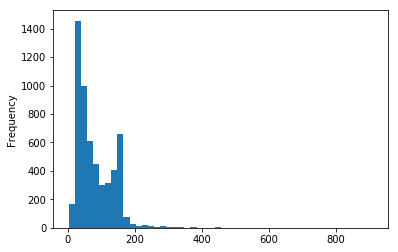

In [20]:
msgs['tamanho'].plot(bins=50,kind='hist')

In [22]:
msgs['tamanho'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: tamanho, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc845a77240>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fc8459edda0>], dtype=object)

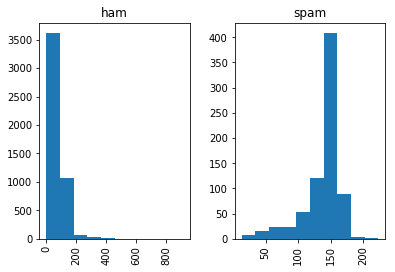

In [24]:
msgs.hist(column='tamanho',by='class')

## Parece que o tamanho do texto é um indicativo interessante sobre se o texto é um Spam.

Vamos criar mais features! 

[Bag-of-Words - wiki](https://en.wikipedia.org/wiki/Bag-of-words_model)

[Bag-of-words - Udacity Quick Video](https://www.youtube.com/watch?v=OGK9SHt8SWg)

In [26]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [28]:
def remove_stopwords(list_of_words):
    return [word for word in list_of_words if word not in stopwords.words('english')]

In [34]:
msgs['tokens'] = msgs['message'].map(word_tokenize).map(remove_stopwords)

In [36]:
msgs['tokens']

0       [Go, jurong, point, ,, crazy.., Available, bug...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3       [U, dun, say, early, hor, ..., U, c, already, ...
4       [Nah, I, n't, think, goes, usf, ,, lives, arou...
5       [FreeMsg, Hey, darling, 's, 3, week, 's, word,...
6       [Even, brother, like, speak, ., They, treat, l...
7       [As, per, request, 'Melle, Melle, (, Oru, Minn...
8       [WINNER, !, !, As, valued, network, customer, ...
9       [Had, mobile, 11, months, ?, U, R, entitled, U...
10      [I, 'm, gon, na, home, soon, n't, want, talk, ...
11      [SIX, chances, win, CASH, !, From, 100, 20,000...
12      [URGENT, !, You, 1, week, FREE, membership, £1...
13      [I, 've, searching, right, words, thank, breat...
14       [I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL, !, !]
15      [XXXMobileMovieClub, :, To, use, credit, ,, cl...
16                       [Oh, k, ..., 'm, watching, :, )]
17      [Eh, u

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
def process(document):
    tokens = word_tokenize(document)
    return [word for word in tokens if word not in stopwords.words('english')]

In [38]:
bow_trans = CountVectorizer(analyzer=process)

In [39]:
bow_trans.fit(msgs['message'])

CountVectorizer(analyzer=<function process at 0x7fc840799f28>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

# Aqui pegamos uma mensagem do dataframe e vemos o que ela retorna

In [42]:
m = msgs['message'][0]
m

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

# Ao coloca-lá no metodo `transform` do nosso bag-of-words, o resultado é a matriz que relaciona as palavras únicas com sua occorrencia. 

Abaixo fica representado assim:

`(0,Numero_da_palavra) ________ Numero de ocorrências na frase`

In [62]:
mn = bow_trans.transform([m])
print(mn)

  (0, 94)	1
  (0, 121)	2
  (0, 1348)	1
  (0, 1737)	1
  (0, 2342)	1
  (0, 5026)	1
  (0, 5583)	1
  (0, 5584)	1
  (0, 6130)	1
  (0, 6566)	1
  (0, 7277)	1
  (0, 7306)	1
  (0, 7916)	1
  (0, 8037)	1
  (0, 8691)	1
  (0, 9276)	1
  (0, 11322)	1
  (0, 11506)	1


In [64]:
print(bow_trans.get_feature_names()[11506])

world


## Vamos utilizar o `.transform` para pegar nossa matriz com os termos e suas frequencias

[.transform](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.transform)

In [65]:
messages_bow = bow_trans.transform(msgs['message'])

In [66]:
print(messages_bow.shape)

(5572, 11766)


# TF-IDF

É uma maneira de saber o quão importante é uma palavra em um documento. 


[TF-IDF](http://www.tfidf.com/)

In [67]:
from sklearn.feature_extraction.text import TfidfTransformer

In [68]:
tfidf_trans = TfidfTransformer().fit(messages_bow)

In [71]:
tfidf = tfidf_trans.transform(mn)

In [74]:
print(tfidf)

  (0, 11506)	0.215432162073
  (0, 11322)	0.18330263095
  (0, 9276)	0.23742075352
  (0, 8691)	0.162968085083
  (0, 8037)	0.25374618694
  (0, 7916)	0.300361000455
  (0, 7306)	0.176320657612
  (0, 7277)	0.143869349103
  (0, 6566)	0.182789254869
  (0, 6130)	0.300361000455
  (0, 5584)	0.258236244131
  (0, 5583)	0.286727041513
  (0, 5026)	0.300361000455
  (0, 2342)	0.232608918943
  (0, 1737)	0.300361000455
  (0, 1348)	0.277053593698
  (0, 121)	0.200099162206
  (0, 94)	0.082492187


In [75]:
messages_tfidf = tfidf_trans.transform(messages_bow)

In [77]:
print(messages_tfidf)

  (0, 11506)	0.215432162073
  (0, 11322)	0.18330263095
  (0, 9276)	0.23742075352
  (0, 8691)	0.162968085083
  (0, 8037)	0.25374618694
  (0, 7916)	0.300361000455
  (0, 7306)	0.176320657612
  (0, 7277)	0.143869349103
  (0, 6566)	0.182789254869
  (0, 6130)	0.300361000455
  (0, 5584)	0.258236244131
  (0, 5583)	0.286727041513
  (0, 5026)	0.300361000455
  (0, 2342)	0.232608918943
  (0, 1737)	0.300361000455
  (0, 1348)	0.277053593698
  (0, 121)	0.200099162206
  (0, 94)	0.082492187
  (1, 11418)	0.374364299349
  (1, 11052)	0.193567741123
  (1, 8946)	0.47129244849
  (1, 8068)	0.353621179889
  (1, 3383)	0.277523185202
  (1, 2751)	0.525163130593
  (1, 121)	0.349861341165
  :	:
  (5569, 121)	0.171918621464
  (5569, 119)	0.100840939454
  (5569, 94)	0.141749149914
  (5569, 43)	0.35241805291
  (5570, 11361)	0.198860888973
  (5570, 11141)	0.223858983956
  (5570, 10280)	0.218448077781
  (5570, 8779)	0.221742864512
  (5570, 8162)	0.168623169581
  (5570, 7755)	0.300674318379
  (5570, 7352)	0.255274450701


# Agora vamos treinar nosso Classificador!

In [95]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline

In [93]:
X_train,X_test,Y_train,Y_test = train_test_split(np.ravel(msgs['message']),np.ravel(msgs['class']))

# Importante

## Pipeline

ver **[Sklearn - Pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)**

In [96]:
pipe = Pipeline([
    ('bow',CountVectorizer(analyzer=process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [97]:
pipe.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function process at 0x7fc840799f28>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
 ...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [98]:
predictions = pipe.predict(X_test)

In [99]:
print(classification_report(predictions,Y_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1276
       spam       0.68      1.00      0.81       117

avg / total       0.97      0.96      0.96      1393

